# Plotting Tools

In [1]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

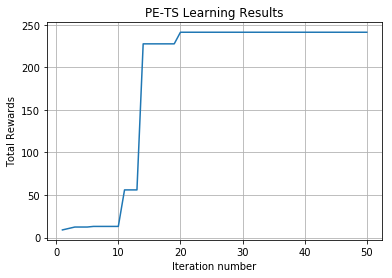

In [23]:
log_dir = "scripts/log"       # Directory specified in script, not including date+time
min_num_trials = 50   # Plots up to this many trials


returns = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
returns = np.array(returns)
returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("PE-TS Learning Results")
plt.grid()
plt.xlabel("Iteration number")
plt.ylabel("Total Rewards")
plt.show()

ValueError: setting an array element with a sequence.

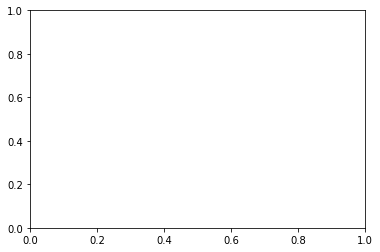

In [18]:
rewards = []
for subdir in os.listdir(log_dir):
    data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    if data["rewards"].shape[1] >= min_num_trials:
        rewards.append(data["rewards"][0][:min_num_trials])
rewards = np.array(rewards)
mean = np.mean(rewards, axis=0)

# Plot result
plt.figure()
plt.plot(np.arange(1, min_num_trials + 1), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Reward")
plt.show()

In [20]:
data.keys()

dict_keys(['__version__', '__header__', 'observations', '__globals__', 'rewards', 'returns', 'actions'])